<h1>Lego Analysis</h1>

<img src="assets/bricks.jpg" width="900" height="300">

<h3>Imports</h3

In [117]:
import pandas as pd
import matplotlib.pyplot as plt

<h3>Read CSV data to pandas dataframes.</h3>

In [118]:
colors = pd.read_csv('data/colors.csv')

<h2>Color Data Exploration.</h2>

In [119]:
colors.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [120]:
colors['name'].nunique()

135

In [121]:
colors.is_trans.value_counts()

f    107
t     28
Name: is_trans, dtype: int64

<h2>Lego Themes v.s. Sets</h2>
<p>Lego themes include famous buildings, Harry Potter, Batman are groupings of sets which are for individual sale.</p>
<img src="assets/lego_themes.png" height="300" width="900">

<p>A Lego <strong>set</strong> is a box with a particular scene from a theme. A single theme generally has multiple sets.</p>
<img src="assets/lego_sets.png" height="300" width="900">

In [122]:
sets = pd.read_csv('data/sets.csv')

In [123]:
sets.count()

set_num      15710
name         15710
year         15710
theme_id     15710
num_parts    15710
dtype: int64

In [124]:
sets.sort_values('year').head()

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


In [125]:
sets[sets['year'] == 1949]

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


In [126]:
sets.sort_values('year').tail()

,set_num,name,year,theme_id,num_parts
11289,75290-1,Mos Eisley Cantina,2020,158,0
5147,41430-1,Summer Fun Water Park,2020,494,1012
11337,75550-1,Minions Kung Fu Battle,2021,689,0
11335,75547-1,Minion Pilot in Training,2021,689,0
11334,75546-1,Minions in Gru’s Lab,2021,689,0


In [127]:
sets.sort_values('num_parts', ascending=False).head()

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


In [128]:
sets_by_year = sets.groupby('year').count()
sets_by_year['set_num'].head()

year
1949     5
1950     6
1953     4
1954    14
1955    28
Name: set_num, dtype: int64

In [129]:
sets_by_year['set_num'].tail()

year
2017    786
2018    816
2019    840
2020    674
2021      3
Name: set_num, dtype: int64

In [130]:
sets_by_year['set_num']

year
1949      5
1950      6
1953      4
1954     14
1955     28
       ... 
2017    786
2018    816
2019    840
2020    674
2021      3
Name: set_num, Length: 71, dtype: int64

<h5>Data from late 2020, so 2020 data is not yet complete and 2021 data is only confirmed releases at the time of data collection</h5>
<p>Chart below has las two years (2020, 2021) of data removed to better show trend.

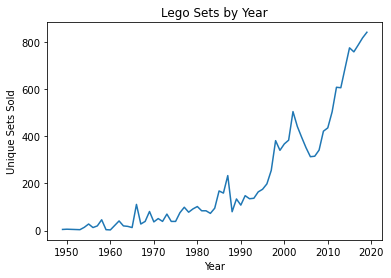

In [131]:
plt.xlabel('Year')
plt.ylabel('Unique Sets Sold')
plt.title('Lego Sets by Year')
plt.plot(sets_by_year.index[:-2], sets_by_year.set_num[:-2])

In [132]:
themes_by_year = sets.groupby('year').agg({'theme_id': pd.Series.nunique})
themes_by_year.rename(columns = {'theme_id': 'nr_themes'}, inplace=True)

In [133]:
themes_by_year.head()

,nr_themes
year,
1949,2
1950,1
1953,2
1954,2
1955,4


In [134]:
themes_by_year.tail()

,nr_themes
year,
2017,89
2018,93
2019,78
2020,82
2021,1


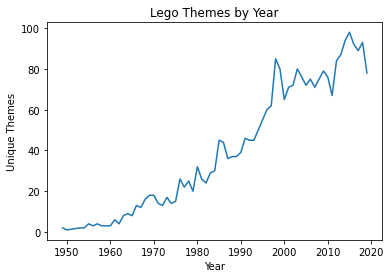

In [135]:
plt.xlabel('Year')
plt.ylabel('Unique Themes')
plt.title('Lego Themes by Year')

plt.plot(themes_by_year.index[:-2], themes_by_year.nr_themes[:-2])

Text(0, 0.5, 'Number of Themes')

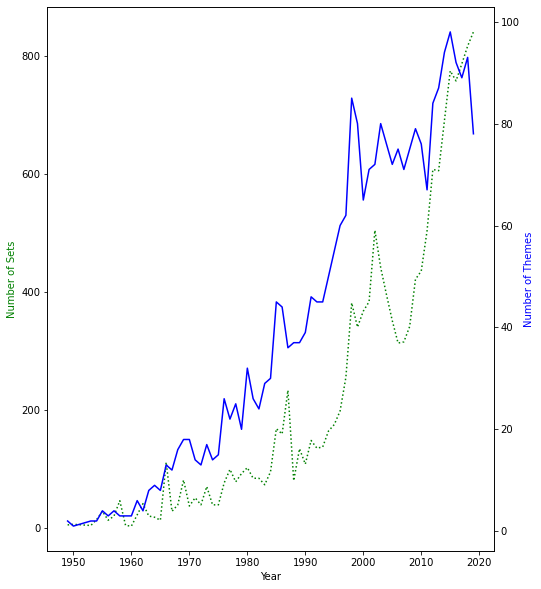

In [136]:
plt.figure(figsize=(8, 10))
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.plot(sets_by_year['set_num'][:-2], 'g:')
ax2.plot(themes_by_year[:-2], color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Sets', color='green')
ax2.set_ylabel('Number of Themes', color='blue')

In [137]:
parts_per_set = sets.groupby('year').agg({'num_parts': pd.Series.mean})

In [138]:
parts_per_set.head()

,num_parts
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143


In [139]:
parts_per_set.tail()

,num_parts
year,
2017,221.840967
2018,213.618873
2019,207.510714
2020,259.732938
2021,0.000000


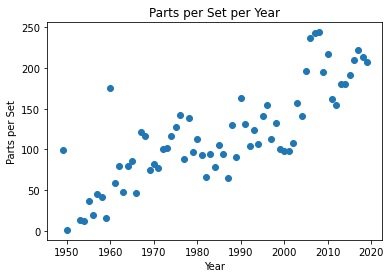

In [140]:
y = parts_per_set.index[:-2]
x = parts_per_set.num_parts[:-2]


plt.xlabel('Year')
plt.ylabel('Parts per Set')
plt.title('Parts per Set per Year')

plt.scatter(y,x)

<h2>Sets per Lego Theme</h2>

In [141]:
set_themes = sets['theme_id'].value_counts()
set_theme_count = pd.DataFrame({'id': set_themes.index,
                                'set_count': set_themes.values})

In [142]:
set_theme_count.head()

,id,set_count
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329


<h4>Database Schema</h4>
<img src="assets/db_relations.png" height="368" width="670">

In [143]:
themes = pd.read_csv('data/themes.csv')

In [144]:
merged_themes = pd.merge(set_theme_count, themes, on='id')
merged_themes.head()

,id,set_count,name,parent_id
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN
2,494,398,Friends,NaN
3,435,356,Ninjago,NaN
4,503,329,Key Chain,501.0


<BarContainer object of 10 artists>

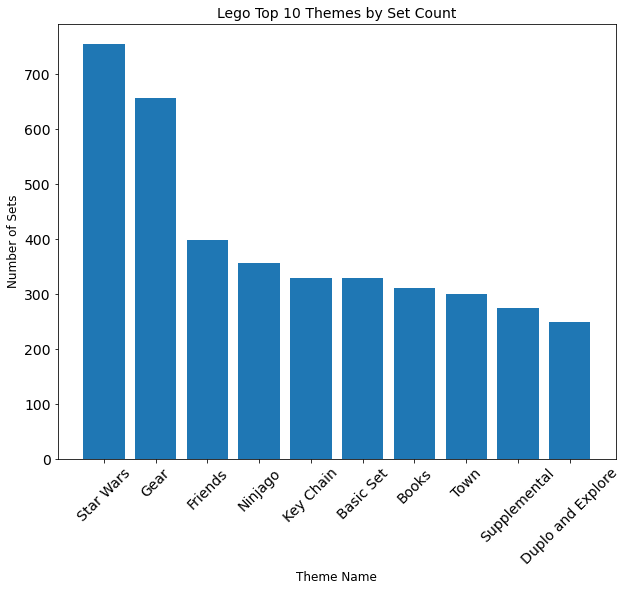

In [156]:
plt.figure(figsize=(10,8))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.title('Lego Top 10 Themes by Set Count', fontsize=14)
plt.ylabel('Number of Sets', fontsize=12)
plt.xlabel('Theme Name', fontsize=12)

plt.bar(merged_themes.name[:10], merged_themes.set_count[:10])

<h3>Exploration of the Most Popular Theme (Star Wars)</h3>

In [157]:
themes[themes.name == 'Star Wars']

,id,name,parent_id
17,18,Star Wars,1.0
150,158,Star Wars,NaN
174,209,Star Wars,207.0
211,261,Star Wars,258.0


In [158]:
sets[sets.theme_id == 18]

,set_num,name,year,theme_id,num_parts
8786,65081-1,R2-D2 / C-3PO Droid Collectors Set,2002,18,1
12051,8000-1,Pit Droid,2000,18,223
12058,8001-1,Battle Droid,2000,18,336
12066,8002-1,Destroyer Droid,2000,18,567
12071,8007-1,C-3PO,2001,18,339
12072,8008-1,Stormtrooper,2001,18,360
12073,8009-1,R2-D2,2002,18,239
12074,8010-1,Darth Vader,2002,18,388
12081,8011-1,Jango Fett,2002,18,425
12083,8012-1,Super Battle Droid,2002,18,378


In [159]:
sets[sets.theme_id == 158]

,set_num,name,year,theme_id,num_parts
850,11912-1,Star Wars: Build Your Own Adventure,2016,158,73
855,11920-1,Parts for Star Wars Build Your Own Adventure: ...,2019,158,70
1717,20006-1,Clone Turbo Tank - Mini,2008,158,64
1728,20007-1,Republic Attack Cruiser - Mini,2009,158,84
1738,20009-1,AT-TE Walker - Mini,2009,158,94
...,...,...,...,...,...
15686,VP-4,Star Wars Co-Pack of 7101 7111 and 7171,2000,158,0
15689,VP-8,Star Wars Co-Pack of 7130 and 7150,2000,158,0
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52


In [160]:
sets[sets.theme_id == 209] # Advent Calendars

,set_num,name,year,theme_id,num_parts
11013,75023-1,Star Wars Advent Calendar 2013,2013,209,254
11046,75056-1,Star Wars Advent Calendar 2014,2014,209,273
11080,75097-1,Star Wars Advent Calendar 2015,2015,209,291
11131,75146-1,Star Wars Advent Calendar 2016,2016,209,282
11173,75184-1,Star Wars Advent Calendar 2017,2017,209,309
11206,75213-1,Star Wars Advent Calendar 2018,2018,209,307
11245,75245-1,Star Wars Advent Calendar 2019,2019,209,280
11281,75279-1,Star Wars Advent Calendar 2020,2020,209,312
12019,7958-1,Star Wars Advent Calendar 2011,2011,209,267
14352,9509-1,Star Wars Advent Calendar 2012,2012,209,235


In [161]:
sets[sets.theme_id == 261] # Theme of 2 developer sets

,set_num,name,year,theme_id,num_parts
14630,9748-1,Droid Developer Kit,1999,261,658
14636,9754-1,Dark Side Developers Kit,2000,261,578


The set count above seems to only have sets where theme_id = 158, not 18, 209, or 261 (though that only <em>adds</em> 23 more sets. Potentially other top sets have missing items? Let's see...

In [162]:
themes[themes.name == 'Gear']

,id,name,parent_id
407,501,Gear,NaN


In [168]:
sets[sets.theme_id == 501]

,set_num,name,year,theme_id,num_parts
1048,13078-1,"Sports Bag, Pink",2008,501,0
1051,13098-1,"Pencil Case, Pink (Horses)",2008,501,0
1056,13148-1,"Wheeled Carry-on Luggage, Pink (Horses)",2008,501,0
1787,2027-1,Alpha Pen Pack,2000,501,0
2354,258175-1,Play and Build Remote for Nintendo Wii - Red,2010,501,0
...,...,...,...,...,...
15555,pk1062,Road Safety Kit Poster,1981,501,0
15558,PS3038-1,LEGO Star Wars: The Complete Saga,2007,501,0
15603,STATICKER-1,Unikitty Staticker,2019,501,0
15610,SWDVDBD-1,The Padawan Menace,2011,501,4


Total: 656 sets as expected with only one theme_id.

In [163]:
themes[themes.name == 'Friends']

,id,name,parent_id
181,216,Friends,207.0
402,494,Friends,NaN
492,595,Friends,591.0


In [165]:
sets[sets.theme_id == 216]

,set_num,name,year,theme_id,num_parts
3632,3316-1,Friends Advent Calendar 2012,2012,216,215
4804,41016-1,Friends Advent Calendar 2013,2013,216,235
4830,41040-1,Friends Advent Calendar 2014,2014,216,243
4893,41102-1,Friends Advent Calendar 2015,2015,216,252
4924,41131-1,Friends Advent Calendar 2016,2016,216,234
5045,41326-1,Friends Advent Calendar 2017,2017,216,217
5074,41353-1,Friends Advent Calendar 2018,2018,216,500
5102,41382-1,Friends Advent Calendar 2019,2019,216,330
5135,41420-1,Friends Advent Calendar 2020,2020,216,236


In [166]:
sets[sets.theme_id == 494]

,set_num,name,year,theme_id,num_parts
844,11908-1,Build Your Own Adventure with Liza Mini-Doll a...,2015,494,77
1566,18703535-1,Hamster Play Time - Friends Magazine - Polish ...,2016,494,24
2892,30100-1,Andrea on the Beach,2012,494,28
2893,30101-1,Skate Boarder,2012,494,28
2894,30102-1,Desk,2012,494,28
...,...,...,...,...,...
15174,ICECREAMTRUCK-1,Ice Cream Truck,2020,494,60
15509,MOMENTS-1,This moments,2015,494,18
15561,PUPPY-HOUSE-2,Puppy House,2019,494,72
15641,TRUFRIENDS-1,Wishing Well,2016,494,33


In [167]:
sets[sets.theme_id == 595]

,set_num,name,year,theme_id,num_parts
529,10726-1,Stephanie's Horse Carriage,2016,595,58
530,10727-1,Emma's Ice Cream Truck,2016,595,136
531,10728-1,Mia's Vet Clinic,2016,595,182
549,10746-1,Mia's Farm Suitcase,2017,595,106
550,10747-1,Andrea and Stephanie's Beach Holiday,2017,595,143
551,10748-1,Emma's Pet Party,2018,595,67
552,10749-1,Mia's Organic Food Market,2018,595,115
567,10763-1,Stephanie's Lakeside House,2018,595,215


Total count: 415. Also seems to only count the primary set.

Regardless due to the overwhelming nature of Star Wars' dominance further analysis is not necessary.